<a href="https://colab.research.google.com/github/PervejHosen/DS_Projects/blob/main/Project_01_Breast_Cancer_Prediction_using_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Connecting with google drive from Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading & Reading dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Python/Datasets/BRCA Data.csv")
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


**Missing Value check**

In [4]:
# null values
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [5]:
df.isnull()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
337,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
338,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
339,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


**Dataset Info**

In [6]:
df.shape

(341, 16)

**Removing Missing values**

In [7]:
# drop null values
df.dropna(inplace=True)

In [8]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [9]:
df.shape

(317, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [11]:
df.Gender.value_counts() #Highly imbalanced column

FEMALE    313
MALE        4
Name: Gender, dtype: int64

**Info:**
* It can be seen clearly that gender column is highly imbalanced

In [12]:
print('Patient Status in 100%')
round(df.Patient_Status.value_counts()*100/len(df),1)

Patient Status in 100%


Alive    80.4
Dead     19.6
Name: Patient_Status, dtype: float64

# Visulization

**Lets check how many columns do we have?**

In [13]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [14]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole =.50,
             title="Patient Status")
figure.show()

In [15]:
stage = df["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole = 0.5,
             title="Tumour Stages of Patients")
figure.show()

In [16]:
histology = df["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Histology of Patients")
figure.show()

In [17]:
ER_status = df['ER status'].value_counts()
transactions = ER_status.index
quantity = ER_status.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="ER Status")
figure.show()

In [18]:
PR_status = df['PR status'].value_counts()
transactions = PR_status.index
quantity = PR_status.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Patient Status")
figure.show()

**Info:**
* As we can see we have same values for `ER Status` & `PR Status` column.
* Thus we can remove this column.

In [19]:
HER2_status = df['HER2 status'].value_counts()
transactions = HER2_status.index
quantity = HER2_status.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="HER2 status")
figure.show()

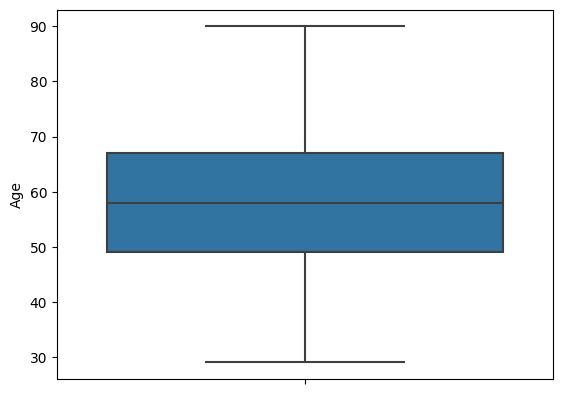

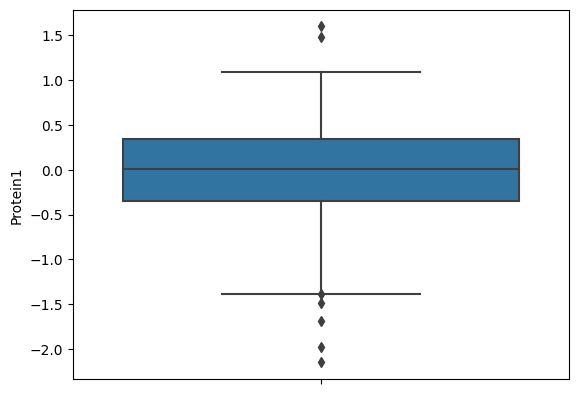

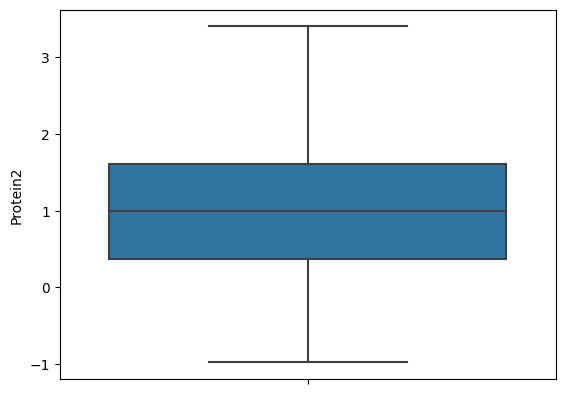

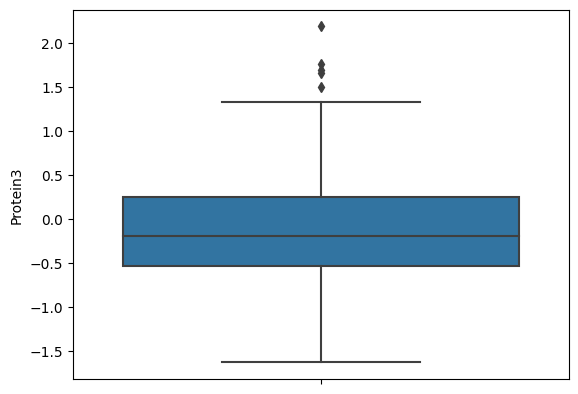

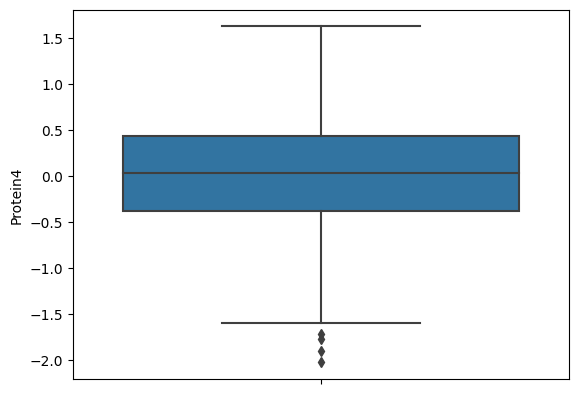

In [20]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
    plt.figsize=(10,5)
    sns.boxplot(y = df[i])
    plt.show()

**`Patient_ID` , `ER status` , `PR status` , `Date_of_Surgery` , `Date_of_Last_Visit` isn't that much of significance to work with, thus we can get rid of them.**

In [21]:
df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [22]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


**Lets profile our Clean dataset**

In [23]:
#!pip install pandas-profiling

In [24]:
import pandas_profiling
from pandas_profiling import ProfileReport
ProfileReport(df, title="EDA Report of Breast Cancer Dataset")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
#!pip install pycaret
#!pip install mlflow

In [26]:
from pycaret.classification import *

In [27]:
cancer = setup(data = df, target = 'Patient_Status',
                  normalize = True,
                  transformation = True,
                  log_experiment = True,
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )

,Description,Value
0,Session id,6183
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Ordinal features,2
9,Numeric features,5


* In machine learning, a "MlflowLogger" typically refers to a component or tool used for recording or logging information during the training process.

* It helps track various metrics, such as loss values, accuracy, and other performance indicators, over the course of training a machine learning model.

# Buildin ML Models

* 'LR' - Logistic Regression
    * 'knn' - K Neighbors Classifier
    * 'nb' - Naive Bayes
    * 'dt' - Decision Tree Classifier
    * 'svm' - SVM - Linear Kernel
    * 'rbfsvm' - SVM - Radial Kernel
    * 'gpc' - Gaussian Process Classifier
    * 'mlp' - MLP Classifier
    * 'ridge' - Ridge Classifier
    * 'rf' - Random Forest Classifier
    * 'qda' - Quadratic Discriminant Analysis
    * 'ada' - Ada Boost Classifier
    * 'gbc' - Gradient Boosting Classifier
    * 'lda' - Linear Discriminant Analysis
    * 'et' - Extra Trees Classifier
    * 'xgboost' - Extreme Gradient Boosting
    * 'lightgbm' - Light Gradient Boosting Machine
    * 'catboost' - CatBoost Classifier

In [28]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8222,0.6080,0.1111,1.0000,0.2000,0.1667,0.3015
1,0.8182,0.5451,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7955,0.4983,0.0000,0.0000,0.0000,-0.0421,-0.0719
3,0.7955,0.4683,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7955,0.3476,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8054,0.4935,0.0222,0.2000,0.0400,0.0249,0.0459
Std,0.0122,0.0869,0.0444,0.4000,0.0800,0.0727,0.1308


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [30]:
get_config('X_test')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
197,76.0,FEMALE,-0.24514,0.61407,0.12651,0.39114,I,Infiltrating Ductal Carcinoma,Negative,Other
71,54.0,FEMALE,0.00000,1.38020,-0.49803,-0.50732,II,Infiltrating Ductal Carcinoma,Negative,Other
95,39.0,FEMALE,0.55309,1.99550,-0.14238,-1.06840,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy
217,43.0,FEMALE,0.44281,1.41440,-0.93252,0.12166,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
188,46.0,FEMALE,0.52751,-0.62123,-0.54699,0.39106,II,Infiltrating Ductal Carcinoma,Negative,Other
...,...,...,...,...,...,...,...,...,...,...
228,51.0,FEMALE,-0.38466,0.80609,-1.62740,-0.51291,II,Infiltrating Ductal Carcinoma,Positive,Modified Radical Mastectomy
253,57.0,FEMALE,0.19465,1.66780,0.39339,0.70333,II,Infiltrating Ductal Carcinoma,Negative,Other
273,82.0,FEMALE,0.65960,1.55410,-0.82864,0.27855,II,Infiltrating Ductal Carcinoma,Negative,Other
23,77.0,FEMALE,-0.29870,-0.16129,0.46072,-0.39666,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy


In [31]:
get_config('X_test_transformed')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Lumpectomy,Surgery_type_Other,Surgery_type_Modified Radical Mastectomy,Surgery_type_Simple Mastectomy
197,1.305130,-0.117309,-0.419773,-0.434089,0.483903,0.578965,1.950474,-1.173177,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,1.532477,-0.596513,-0.533745
71,-0.330546,-0.117309,0.009251,0.442200,-0.736286,-0.879963,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,1.532477,-0.596513,-0.533745
95,-1.693839,-0.117309,1.071487,1.169587,0.001008,-1.622756,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,-0.652538,-0.596513,1.873554
217,-1.303329,-0.117309,0.850209,0.482133,-1.772982,0.094872,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,-0.652538,1.676408,-0.533745
188,-1.024503,-0.117309,1.019779,-1.744744,-0.845937,0.578816,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,1.532477,-0.596513,-0.533745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,-0.583045,-0.117309,-0.653830,-0.218050,-3.703973,-0.887838,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,3.170173,-0.526742,-0.652538,1.676408,-0.533745
253,-0.086343,-0.117309,0.368888,0.779905,0.905923,1.186043,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,1.532477,-0.596513,-0.533745
273,1.699939,-0.117309,1.289187,0.645893,-1.512412,0.371915,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,1.532477,-0.596513,-0.533745
23,1.372208,-0.117309,-0.510406,-1.273962,1.005362,-0.721721,-0.512696,0.852386,-0.519726,0.716728,-0.652538,-0.206041,-0.315440,-0.526742,-0.652538,-0.596513,1.873554


In [32]:
get_config('target_param')

'Patient_Status'

In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8099,0.5073,0.0222,0.2000,0.0400,0.0333,0.0603,0.5480
lda,Linear Discriminant Analysis,0.8099,0.4913,0.0444,0.1333,0.0667,0.0519,0.0624,0.1820
ridge,Ridge Classifier,0.8055,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3280
dummy,Dummy Classifier,0.8055,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1800
rf,Random Forest Classifier,0.8054,0.4935,0.0222,0.2000,0.0400,0.0249,0.0459,0.7020
et,Extra Trees Classifier,0.7829,0.5093,0.0222,0.2000,0.0400,-0.0143,-0.0041,0.3460
knn,K Neighbors Classifier,0.7738,0.5346,0.0000,0.0000,0.0000,-0.0538,-0.0692,0.7280
lightgbm,Light Gradient Boosting Machine,0.7647,0.5629,0.0917,0.2750,0.1307,0.0307,0.0428,0.2640
gbc,Gradient Boosting Classifier,0.7601,0.4410,0.0444,0.0800,0.0571,-0.0323,-0.0421,0.2700
xgboost,Extreme Gradient Boosting,0.7557,0.5366,0.1167,0.3056,0.1621,0.0434,0.0588,0.2220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6183, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8182,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8182,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7955,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7955,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.8055,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0105,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
unseen_predictions = predict_model(rf, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.8896,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.90
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,1,Alive,0.76
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,0,Alive,0.72
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.95
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,1,Dead,0.79


# Save RF as pickle

In [38]:
save_model(rf, 'model_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [39]:
from pycaret.classification import load_model
loaded_model = load_model('model_rf')

Transformation Pipeline and Model Successfully Loaded


# What is Pipeline in ML?

ML Pipeline is defined as a collection of preprocessing steps and a model. This means when raw data is passed to the ML Pipeline, it preprocesses the data to the right format, scores the data using the model and pops out a prediction score.

In [44]:
#from IPython.display import Image
#Image(filename='pipeline.png')

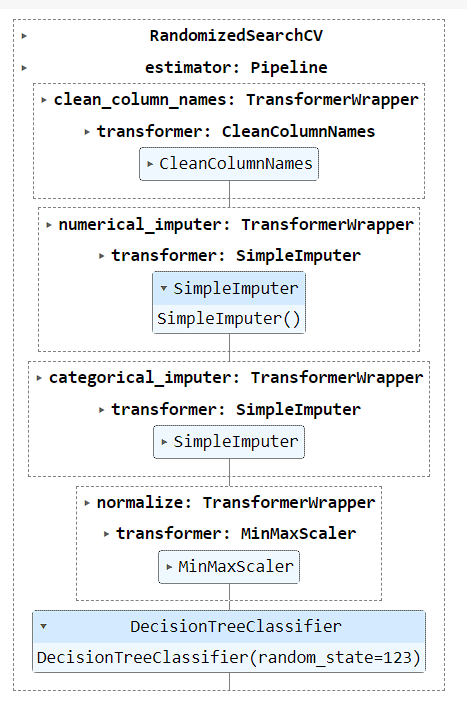

# Prediction

In [43]:
unseen_predictions2 = predict_model(loaded_model, data = df)
unseen_predictions2.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.8896,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.90
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,1,Alive,0.76
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,0,Alive,0.72
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,0.95
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,1,Dead,0.79


# Random Over Sampler

In [45]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole =.60,
             title="Patient Status")
figure.show()

In [46]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(df.drop('Patient_Status', axis=1) , df[['Patient_Status']])

In [47]:
x_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [48]:
x_resampled.shape

(510, 10)

In [49]:
y_resampled.shape

(510, 1)

In [50]:
df2 = pd.concat([x_resampled, y_resampled], axis=1)
df2.shape

(510, 11)

In [51]:
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [52]:
cancer2 = setup(data = df2, target = 'Patient_Status',
                  normalize = True,
                  transformation = True,
                  log_experiment = True,
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )

,Description,Value
0,Session id,4224
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Ordinal features,2
9,Numeric features,5


In [53]:
rf2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9954,0.9722,0.8750,0.9211,0.8333,0.8385
1,0.8889,0.9410,0.9167,0.8684,0.8919,0.7778,0.7790
2,0.9296,0.9536,0.9143,0.9412,0.9275,0.8591,0.8594
3,0.9437,0.9837,0.9444,0.9444,0.9444,0.8873,0.8873
4,0.9155,0.9857,0.9444,0.8947,0.9189,0.8308,0.8321
Mean,0.9189,0.9719,0.9384,0.9048,0.9208,0.8377,0.8393
Std,0.0181,0.0209,0.0213,0.0323,0.0170,0.0363,0.0358


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9245,0.9646,0.9384,0.9153,0.9260,0.8489,0.8506,0.3540
rf,Random Forest Classifier,0.9189,0.9719,0.9384,0.9048,0.9208,0.8377,0.8393,0.6520
xgboost,Extreme Gradient Boosting,0.8597,0.9514,0.9329,0.8159,0.8700,0.7192,0.7280,0.2280
lightgbm,Light Gradient Boosting Machine,0.8543,0.9478,0.9440,0.8022,0.8669,0.7082,0.7207,0.2260
dt,Decision Tree Classifier,0.8376,0.8374,0.9552,0.7762,0.8554,0.6750,0.6966,0.1920
gbc,Gradient Boosting Classifier,0.8205,0.9265,0.9217,0.7701,0.8384,0.6407,0.6552,0.3520
ada,Ada Boost Classifier,0.7645,0.8362,0.8432,0.7308,0.7822,0.5283,0.5365,0.5260
knn,K Neighbors Classifier,0.7255,0.7968,0.8324,0.6895,0.7521,0.4503,0.4661,0.1920
nb,Naive Bayes,0.5798,0.6050,0.3805,0.6630,0.4708,0.1618,0.1872,0.1880
qda,Quadratic Discriminant Analysis,0.5742,0.6437,0.4529,0.6221,0.5085,0.1507,0.1649,0.3280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4224, verbose=0, warm_start=False)

In [55]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9761,0.9722,0.8750,0.9211,0.8333,0.8385
1,0.8889,0.9425,0.9167,0.8684,0.8919,0.7778,0.7790
2,0.9437,0.9421,0.9143,0.9697,0.9412,0.8872,0.8886
3,0.9437,0.9766,0.9444,0.9444,0.9444,0.8873,0.8873
4,0.9296,0.9857,0.9444,0.9189,0.9315,0.8591,0.8594
Mean,0.9245,0.9646,0.9384,0.9153,0.9260,0.8489,0.8506
Std,0.0204,0.0185,0.0213,0.0391,0.0189,0.0409,0.0404


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

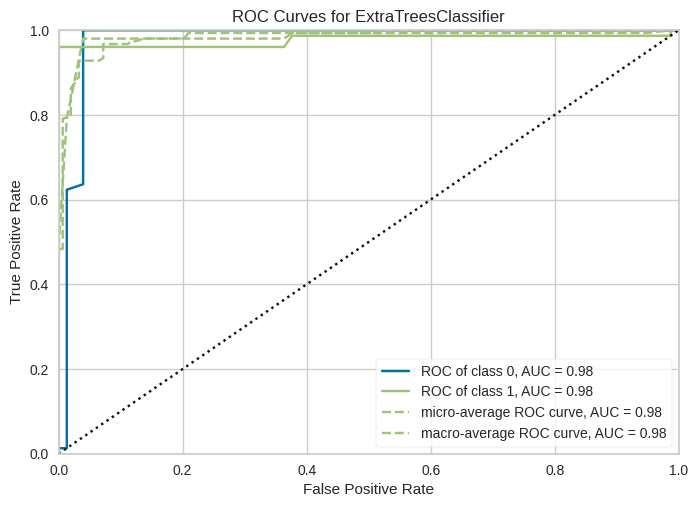

In [57]:
plot_model(et, plot = 'auc')

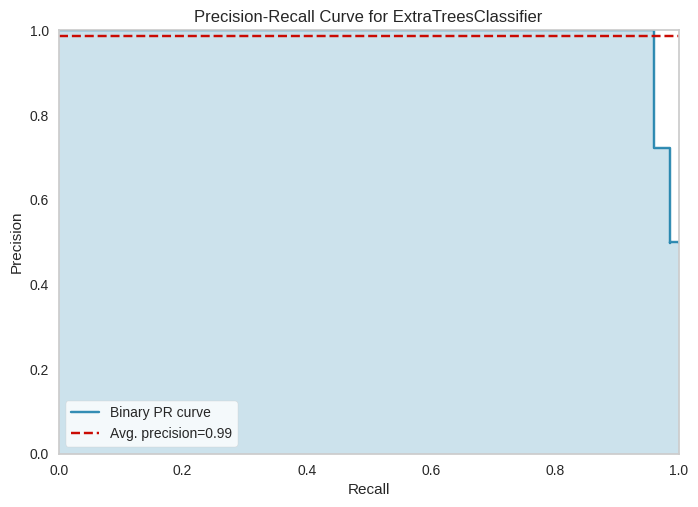

In [58]:
plot_model(et, plot = 'pr')

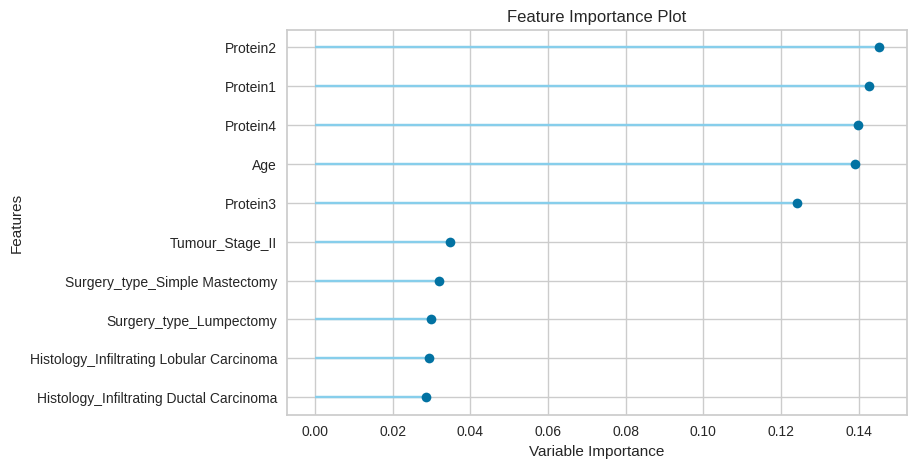

In [59]:
plot_model(et, plot='feature')

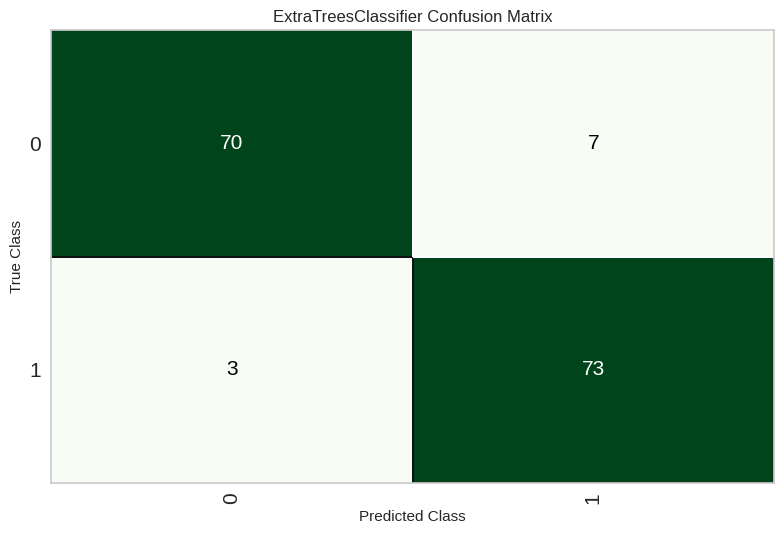

In [60]:
plot_model(et, plot = 'confusion_matrix')

In [61]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [62]:
df.shape

(317, 11)

In [63]:
unseen_predictions = predict_model(et, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9716,0.9934,0.9716,0.9731,0.9720,0.9124,0.9135


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,1.0
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,1,Dead,1.0
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,0,Alive,1.0
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,1.0
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,1,Dead,1.0


In [64]:
unseen_predictions.tail()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
329,36.0,FEMALE,0.23180,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy,1,Dead,1.00
330,44.0,MALE,0.73272,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Negative,Other,1,Dead,1.00
331,61.0,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,1,Dead,1.00
332,79.0,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,1,Dead,1.00
333,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,1,Alive,0.99


# Save the Extra Trees Classifier model

In [65]:
save_model(et, 'model_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feat

In [66]:
loaded_model = load_model('model_et')

Transformation Pipeline and Model Successfully Loaded


In [67]:
unseen_predictions = predict_model(loaded_model, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9716,0.9934,0.9716,0.9731,0.9720,0.9124,0.9135


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,1.0
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,1,Dead,1.0
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,0,Alive,1.0
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,0,Alive,1.0
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,1,Dead,1.0
